# WB Praca Domowa 1

- Nikola Miszalska

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("C:/Users/Nikola/Desktop/students.csv", sep=",")

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

W ramce nie ma braków danych

In [14]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [16]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'class'],
      dtype='object')

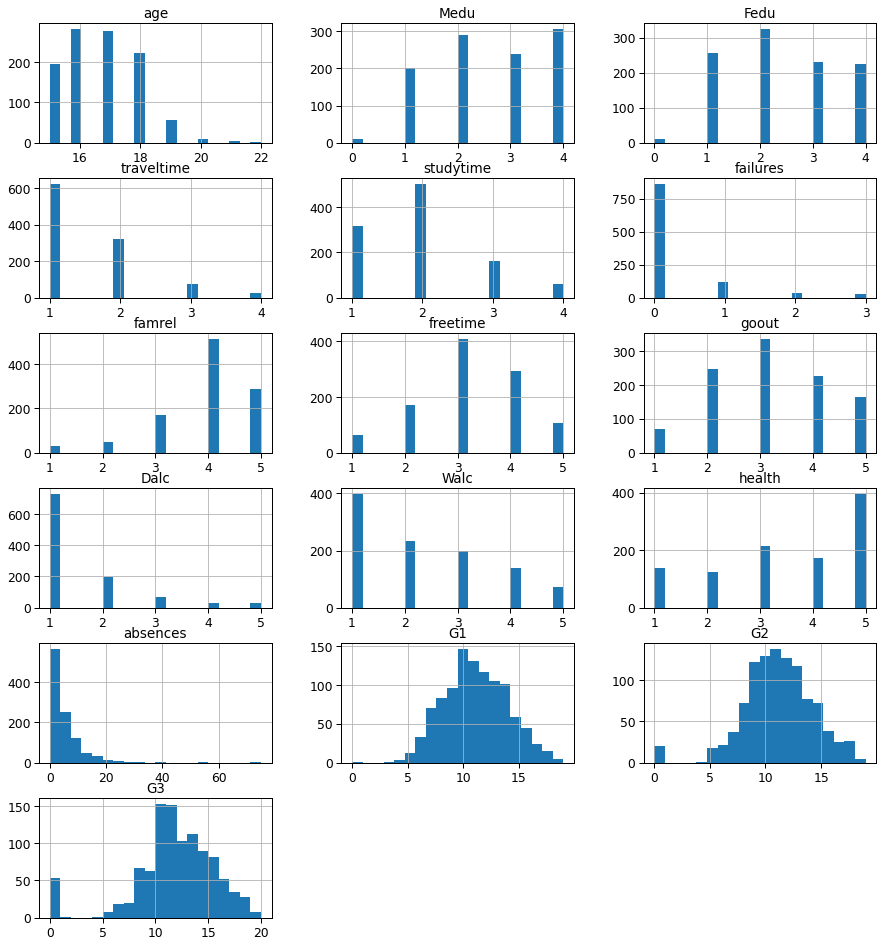

In [26]:
df.hist(bins = 20, figsize = (15,25), layout=(9,3 ))
plt.show()

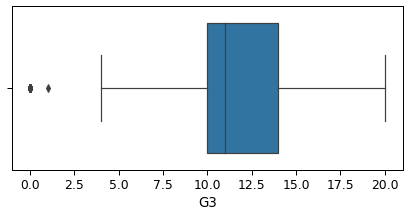

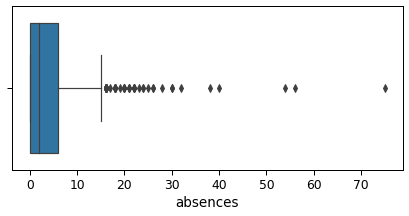

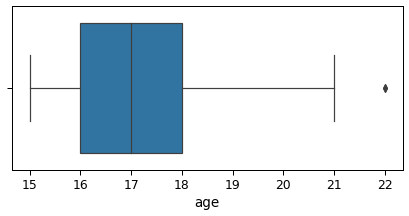

In [11]:
xx = ["G3", "absences","age"]
for i in xx:    
    plt.figure(figsize=(7,3))
    sns.boxplot(data = df, x = i)
    plt.show()

Jedynie pojedyncze wartości przy zmiennej absences można nawać "odstającymi". Sprawdźmy jak wyglądałby wykres po transformacji logarytmicznej.

In [12]:
df.groupby(["absences"]).size()

absences
0     359
1      15
2     175
3      15
4     146
5      17
6      80
7      10
8      64
9      10
10     38
11      8
12     24
13      4
14     20
15      5
16     17
17      1
18      8
19      1
20      4
21      3
22      5
23      1
24      2
25      1
26      2
28      1
30      2
32      1
38      1
40      1
54      1
56      1
75      1
dtype: int64

MFaktycznie jest kilka wartości, które występują tylko raz i odbiegają od reszty. Myślę, że nie jest to konieczne, choć możnaby usunąc wartosć 75. Jednak będąc konsekwentym w takim przypadku może warto by było również usunąc wartość 54 i 56.

<AxesSubplot:>

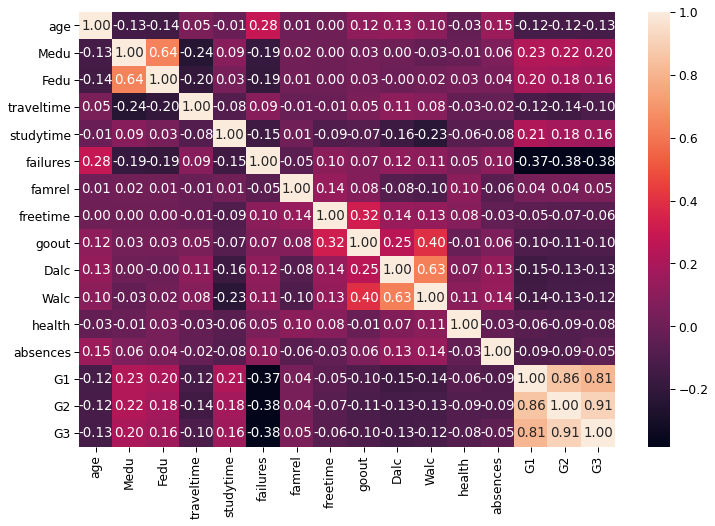

In [5]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, fmt=".2f")

### Zbadajmy zależnośc "Walc" od pozostałych zmiennych.

<AxesSubplot:xlabel='goout', ylabel='Count'>

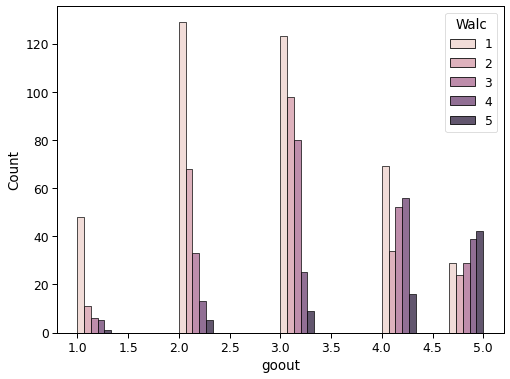

In [56]:
 sns.histplot(data=df, x = "goout", hue="Walc", multiple="dodge")

Widać duża zależność miedzy zmiennymi. Im większa zmienna "goout" tym wększy procent osób z wyższym "Walc".

<AxesSubplot:xlabel='failures', ylabel='Count'>

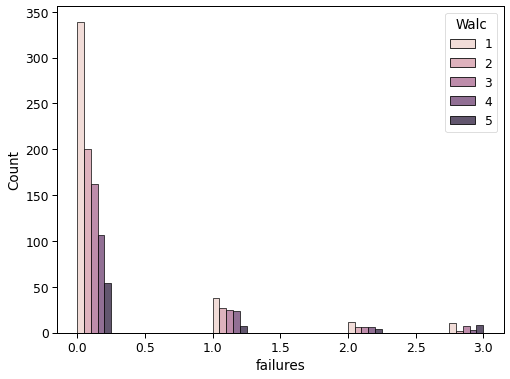

In [54]:
 sns.histplot(data=df, x = "failures", hue="Walc", multiple="dodge")

Wraz ze wzrostem ilości nie zdanych klas, maleje różnica między ilością osób w poszczególnych kategoriach "Walc". Oznacza to, że im większa zmienna "failures" tym w grupie jest większy procent osób z wysokim "Walc".

In [57]:
categorical_columns = list(df.select_dtypes(exclude=[np.number]).columns)
categorical_columns  = [c for c in categorical_columns if c != 'Walc']
categorical_columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'class']

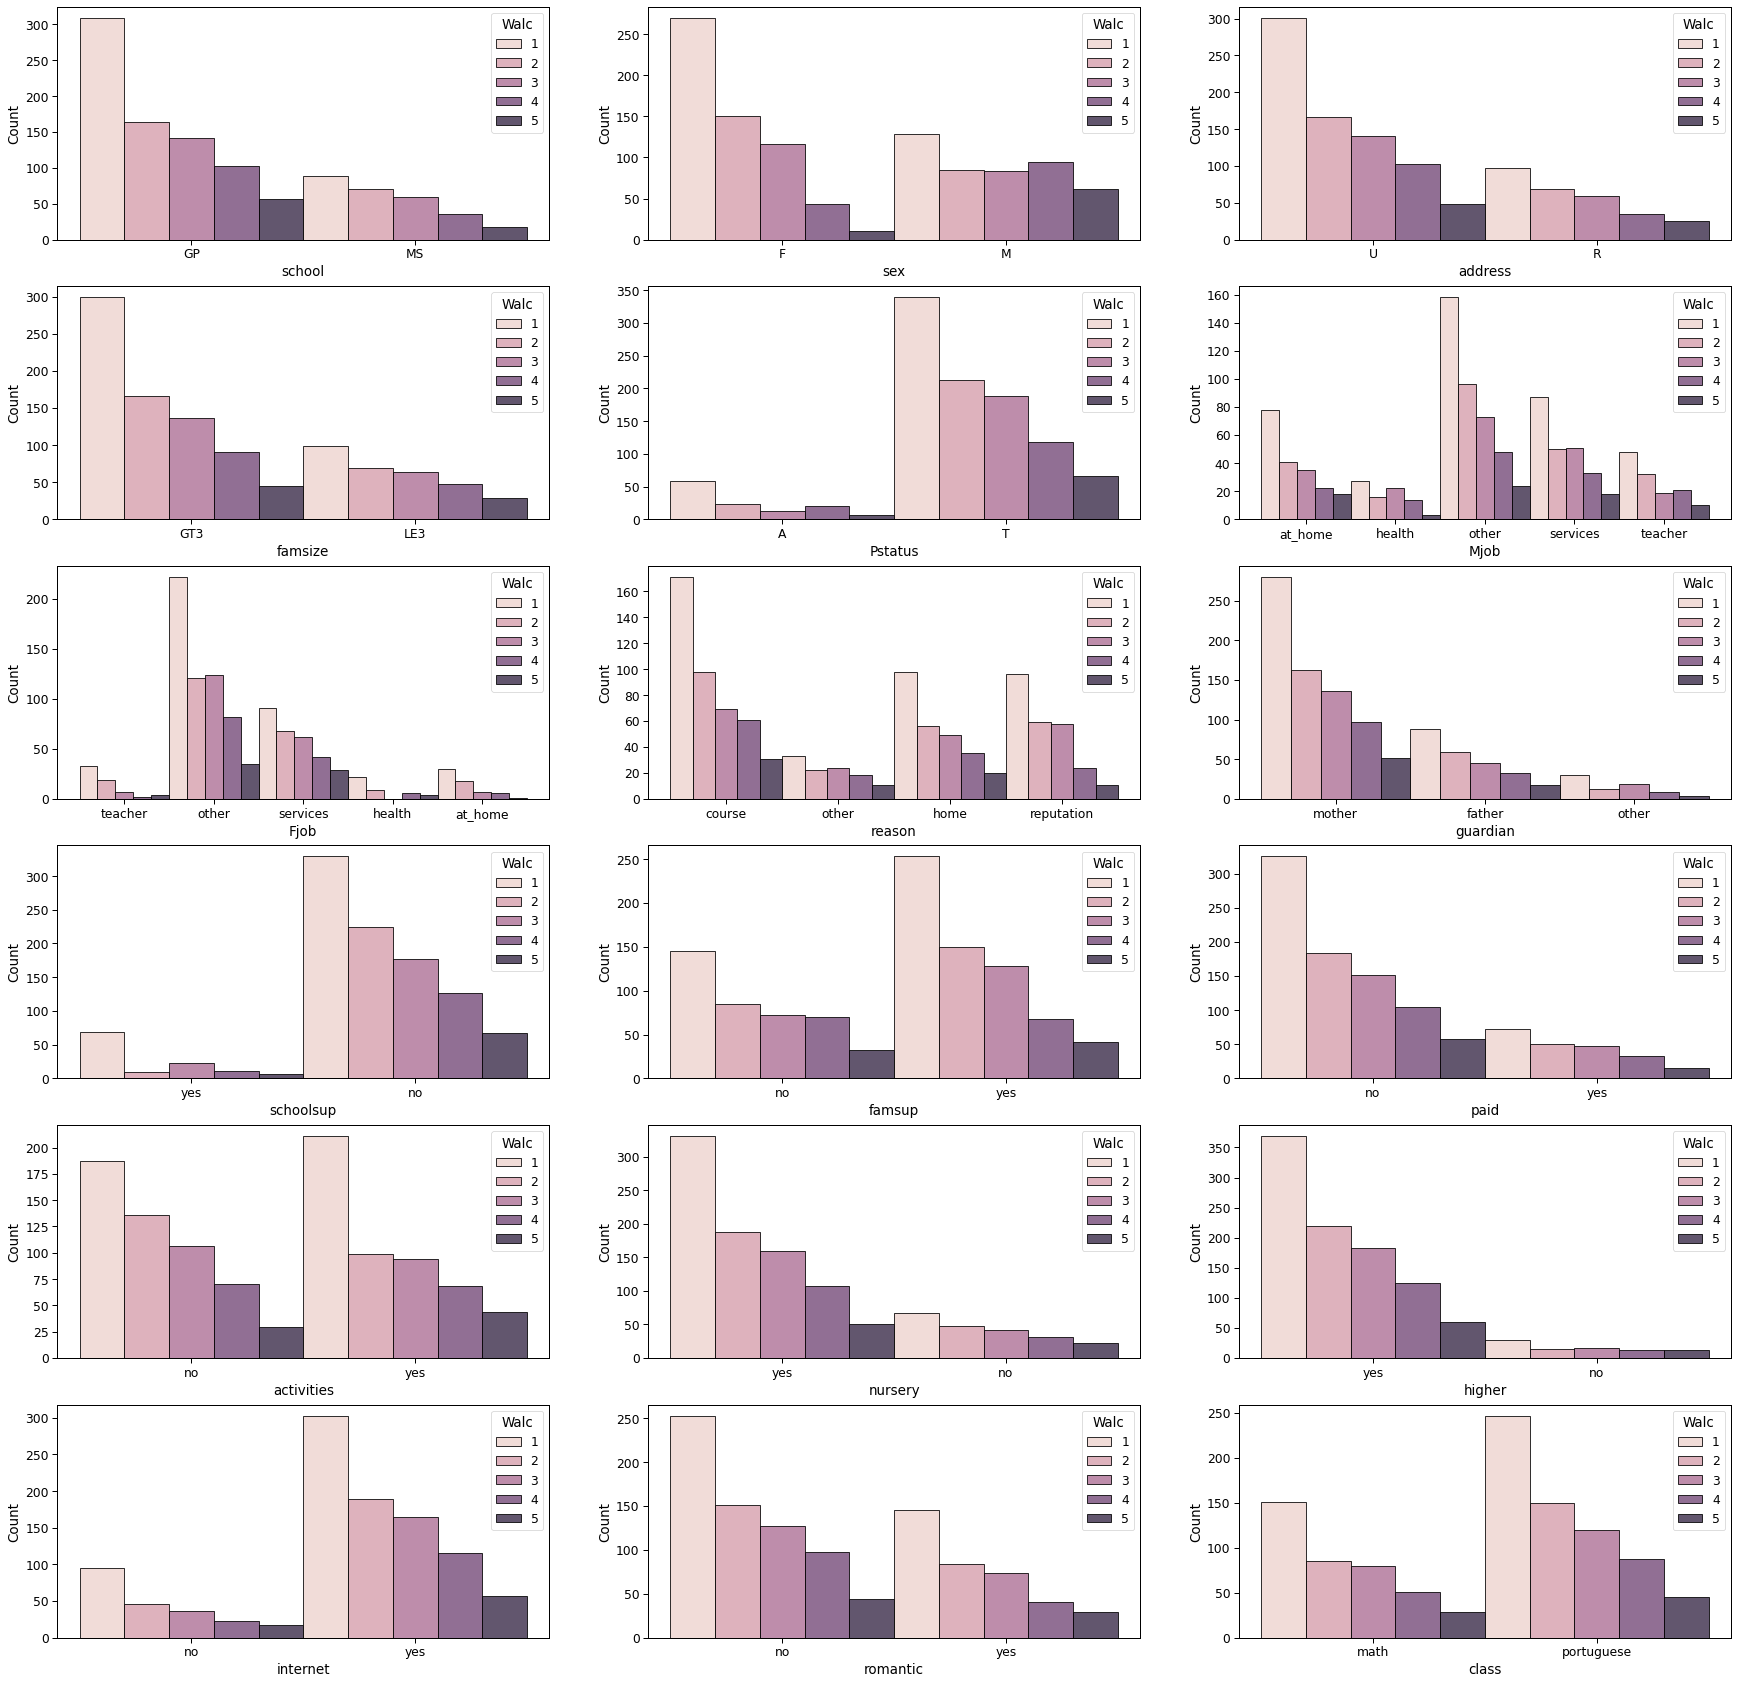

In [58]:
r=3
fig, axs = plt.subplots(6,3, figsize=(30, 30))
for i,c in enumerate(categorical_columns):
    sns.histplot(data=df, x = c, hue="Walc", multiple="dodge", ax = axs[i//r, i%r])
plt.show()

Z wykresów można dostrzec zaelżnośc pomiędzy płcią z spożyciem alkoholu. Wśród kobiet jest największy procent osób, dla których "Walc" wynosi 1, natomiast dla mężczyzn słupk sa na podobnym poziomie. Pobnie dla osób bez wyższego wykształcenia.